In [96]:
import tensorflow as tf
import torch
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [97]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


In [98]:
print("X_train shape:", X_train.shape, "y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape, "y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28) y_train shape: (60000,)
X_test shape: (10000, 28, 28) y_test shape: (10000,)


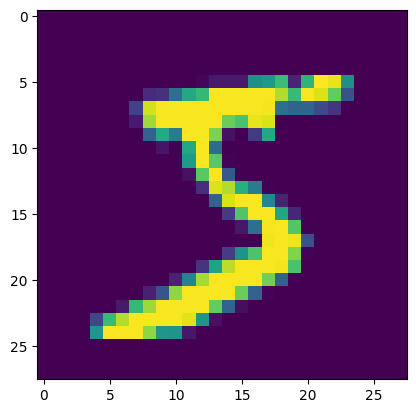

5


In [99]:
plt.imshow(X_train[0])
plt.show()
print(y_train[0])

In [100]:
np.unique(X_train[0])

## Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0


In [101]:
## Implementing the neural network architecture with torch

# linear layer or fully connected layer

# Define the model
class mnistModel(torch.nn.Module):
    def __init__(self):
        super(mnistModel, self).__init__()
        self.flatten = torch.nn.Flatten()
        self.layer1 = torch.nn.Linear(28*28, 128)
        self.activation = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(128, 10)
        self.softmax = torch.nn.Softmax(dim=1)


    def forward(self, x):
        x = self.flatten(x)
        x = self.layer1(x)
        x = self.activation(x)
        x = self.layer2(x)
        x = self.softmax(x)
        return x

# training the model
model = mnistModel()
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)



def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch*len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [102]:
# define the model with tensorflow

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               200960    
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dense_17 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235146 (918.54 KB)
Trainable params: 235146 (918.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1688/1688 [==============================] - 2s 1ms/step - loss: 0.2195 - accuracy: 0.9334 - val_loss: 0.1068 - val_accuracy: 0.9678
Epoch 2/10
1688/1688 [==============================] - 2s 990us/step - loss: 0.0902 - accuracy: 0.9727 - val_loss: 0.0811 - val_accuracy: 0.9745
Epoch 3/10
1688/1688 [==============================] - 2s 987us/step - loss: 0.0619 - accuracy: 0.9796 - val_loss: 0.0855 - val_accuracy: 0.9770
Epoch 4/10
1688/1688 [==============================] - 2s 982us/step - loss: 0.0466 - accuracy: 0.9845 - val_loss: 0.0830 - val_accuracy: 0.9775
Epoch 5/10
1688/1688 [==============================] - 2s 938us/step - loss: 0.0354 - accuracy: 0.9882 - val_loss: 0.0847 - val_accuracy: 0.9790
Epoch 6/10
1688/1688 [==============================] - 2s 929us/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0694 - val_accuracy: 0.9823
Epoch 7/10
1688/1688 [==============================] - 2s 944us/step - loss: 0.0221 - accuracy: 0.9929 - val_loss: 0.0845 - v

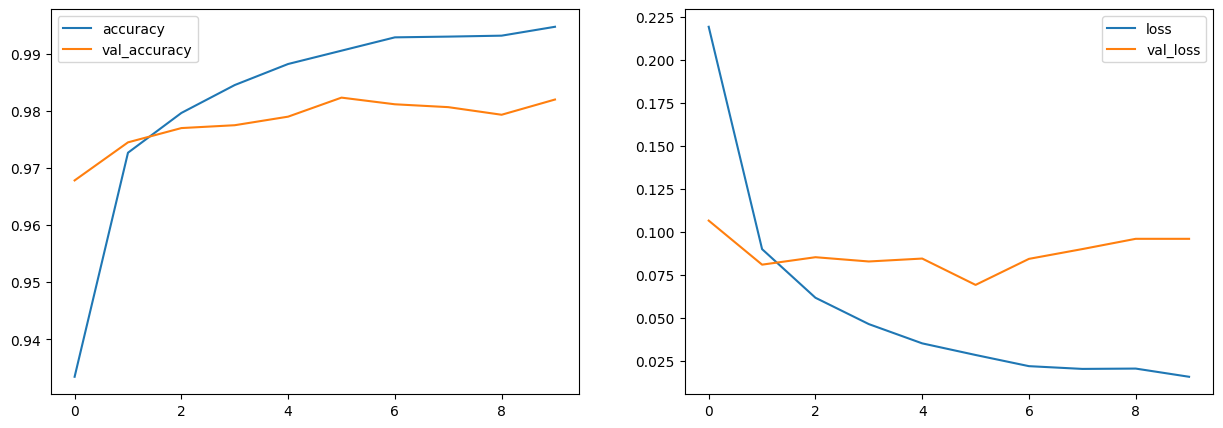

In [104]:
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].plot(history.history['accuracy'], label='accuracy')
ax[0].plot(history.history['val_accuracy'], label='val_accuracy')
ax[0].legend()

ax[1].plot(history.history['loss'], label='loss')
ax[1].plot(history.history['val_loss'], label='val_loss')
ax[1].legend()


In [105]:
probOutput = model.predict(X_test)
prediction = np.argmax(probOutput, axis=1)

print(accuracy_score(y_test, prediction))

313/313 [==============================] - 0s 520us/step
0.9807
